<a href="https://colab.research.google.com/github/fabiodemo/Deep-Learning-CV-CNN-TL/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download da Base de Dados

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz

--2022-09-23 23:20:08--  https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.139.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.139.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1343715595 (1.3G) [application/x-tar]
Saving to: ‘imagewoof2.tgz’

imagewoof2.tgz      100%[===================>]   1.25G  35.9MB/s    in 29s     

2022-09-23 23:20:36 (45.0 MB/s) - ‘imagewoof2.tgz’ saved [1343715595/1343715595]



In [ ]:
!tar zxvf imagewoof2.tgz

A saída de streaming foi truncada nas últimas 5000 linhas.
imagewoof2/train/n02115641/n02115641_9529.JPEG
imagewoof2/train/n02115641/n02115641_12039.JPEG
imagewoof2/train/n02115641/n02115641_8768.JPEG
imagewoof2/train/n02115641/n02115641_7188.JPEG
imagewoof2/train/n02115641/n02115641_6633.JPEG
imagewoof2/train/n02115641/n02115641_25018.JPEG
imagewoof2/train/n02115641/n02115641_10706.JPEG
imagewoof2/train/n02115641/n02115641_11814.JPEG
imagewoof2/train/n02115641/n02115641_51135.JPEG
imagewoof2/train/n02115641/n02115641_7409.JPEG
imagewoof2/train/n02115641/n02115641_29257.JPEG
imagewoof2/train/n02115641/n02115641_17997.JPEG
imagewoof2/train/n02115641/n02115641_6473.JPEG
imagewoof2/train/n02115641/n02115641_2963.JPEG
imagewoof2/train/n02115641/n02115641_52488.JPEG
imagewoof2/train/n02115641/n02115641_6536.JPEG
imagewoof2/train/n02115641/n02115641_6166.JPEG
imagewoof2/train/n02115641/n02115641_21519.JPEG
imagewoof2/train/n02115641/n02115641_504.JPEG
imagewoof2/train/n02115641/n02115641_140

In [ ]:
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
all_train_paths = glob.glob('/content/imagewoof2/train/*/*.JPEG')

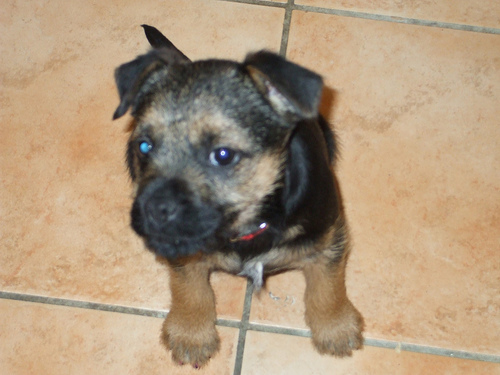

In [ ]:
img_path = random.choice(all_train_paths)
Image.open(img_path)

## Declarando ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = datagen.flow_from_directory('/content/imagewoof2/train',
                            target_size=(224, 224),
                            class_mode='sparse',
                            )

valid_gen = datagen.flow_from_directory('/content/imagewoof2/val',
                            target_size=(224, 224),
                            class_mode='sparse',
                            )

Found 9025 images belonging to 10 classes.
Found 3929 images belonging to 10 classes.


In [ ]:
len(all_train_paths)

9025

## Declarando Modelo

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
base_model = ResNet50(include_top=False,
                      input_shape=(224,224,3),
                      )

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

Precisamos congelar a camada pré-treinada (reaproveitar os pesos do modelo pré-treinado), mudando o parâmetro individual de cada layer

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
model = Sequential([
                    base_model,
                    GlobalAveragePooling2D(),
                    Dense(1024, activation='relu'), # saida terá aprox. 2048 valores, então usamos metade disso para a camada oculta
                    Dense(10, activation='softmax') # softmax retornará probabilidades de cada uma das 10 saídas
                    ])

## Treinar o modelo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 25,696,138
Trainable params: 2,108,426
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
model.fit(train_gen,
          validation_data=valid_gen,
          epochs=3)

Epoch 1/3
283/283 [==============================] - 93s 284ms/step - loss: 0.3429 - accuracy: 0.8962 - val_loss: 0.2158 - val_accuracy: 0.9298
Epoch 2/3
283/283 [==============================] - 78s 274ms/step - loss: 0.1399 - accuracy: 0.9552 - val_loss: 0.2022 - val_accuracy: 0.9359
Epoch 3/3
283/283 [==============================] - 79s 278ms/step - loss: 0.0893 - accuracy: 0.9735 - val_loss: 0.1991 - val_accuracy: 0.9356


## Visualizando Predições

In [ ]:
lbl_dict = dict(
  n02086240= 'Shih-Tzu',
  n02087394= 'Rhodesian ridgeback',
  n02088364= 'Beagle',
  n02089973= 'English foxhound',
  n02093754= 'Australian terrier',
  n02096294= 'Border terrier',
  n02099601= 'Golden retriever',
  n02105641= 'Old English sheepdog',
  n02111889= 'Samoyed',
  n02115641= 'Dingo'
)

In [ ]:
img = Image.open('/content/imagewoof2/val/n02086240/ILSVRC2012_val_00002701.JPEG')

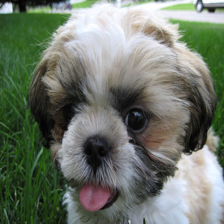

In [ ]:
img = img.resize((224,224))
img

In [ ]:
import numpy as np 

# preprocess somente aceita valores como um array
img_np = np.array(img)
img_np

array([[[ 13,  11,  13],
        [ 15,  18,  15],
        [ 14,  20,  16],
        ...,
        [252, 251, 253],
        [250, 251, 253],
        [248, 250, 255]],

       [[ 13,  14,  10],
        [ 11,  15,  17],
        [ 16,  20,  20],
        ...,
        [241, 252, 255],
        [238, 251, 255],
        [234, 250, 255]],

       [[ 45,  41,  39],
        [ 29,  37,  28],
        [ 17,  21,  13],
        ...,
        [172, 195, 198],
        [164, 189, 192],
        [167, 193, 197]],

       ...,

       [[ 16,  25,  14],
        [ 34,  46,  29],
        [ 38,  62,  33],
        ...,
        [110, 100,  94],
        [108,  97,  81],
        [104,  94,  77]],

       [[ 29,  42,  26],
        [ 31,  44,  26],
        [ 37,  60,  32],
        ...,
        [117, 107, 108],
        [106,  93,  86],
        [104,  92,  83]],

       [[ 39,  54,  35],
        [ 38,  52,  32],
        [ 39,  60,  34],
        ...,
        [126, 118, 122],
        [114, 104,  97],
        [103,  95,  84]]

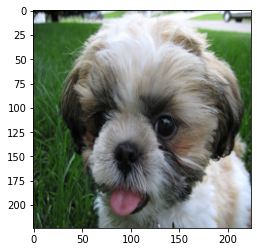

In [ ]:
plt.imshow(img_np)

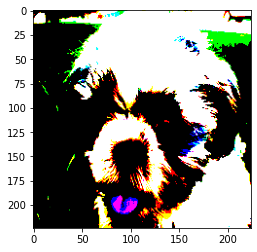

In [ ]:
img_np_preprocess = preprocess_input(img_np)
plt.imshow(img_np_preprocess)

adicionando uma camada extra a img_np

In [ ]:
img_np = img_np.reshape(1, 224, 224, 3) 
# ou
# img_np[None].shape # menos explícito

In [ ]:
result = model.predict(img_np)

In [ ]:
id_max = result[0].argmax()
id_max

0

In [ ]:
train_gen.class_indices.items()

dict_items([('n02086240', 0), ('n02087394', 1), ('n02088364', 2), ('n02089973', 3), ('n02093754', 4), ('n02096294', 5), ('n02099601', 6), ('n02105641', 7), ('n02111889', 8), ('n02115641', 9)])

In [ ]:
train_gen.class_indices

{'n02086240': 0,
 'n02087394': 1,
 'n02088364': 2,
 'n02089973': 3,
 'n02093754': 4,
 'n02096294': 5,
 'n02099601': 6,
 'n02105641': 7,
 'n02111889': 8,
 'n02115641': 9}

In [ ]:
index_to_class = {v: k for k, v in train_gen.class_indices.items()}
index_to_class

{0: 'n02086240',
 1: 'n02087394',
 2: 'n02088364',
 3: 'n02089973',
 4: 'n02093754',
 5: 'n02096294',
 6: 'n02099601',
 7: 'n02105641',
 8: 'n02111889',
 9: 'n02115641'}

In [ ]:
index_to_class[id_max]

'n02086240'

In [ ]:
index_class = index_to_class[id_max]
lbl_dict[index_class]

'Shih-Tzu'

In [ ]:
!wget https://img.freepik.com/premium-photo/white-samoyed-dog-black-bow-tie_74906-1303.jpg

--2022-09-23 23:49:42--  https://img.freepik.com/premium-photo/white-samoyed-dog-black-bow-tie_74906-1303.jpg
Resolving img.freepik.com (img.freepik.com)... 23.77.172.248, 2600:141b:f000:c0a3::312e, 2600:141b:f000:c098::312e
Connecting to img.freepik.com (img.freepik.com)|23.77.172.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42043 (41K) [image/jpeg]
Saving to: ‘white-samoyed-dog-black-bow-tie_74906-1303.jpg’

white-samoyed-dog-b 100%[===================>]  41.06K  --.-KB/s    in 0.1s    

2022-09-23 23:49:43 (421 KB/s) - ‘white-samoyed-dog-black-bow-tie_74906-1303.jpg’ saved [42043/42043]



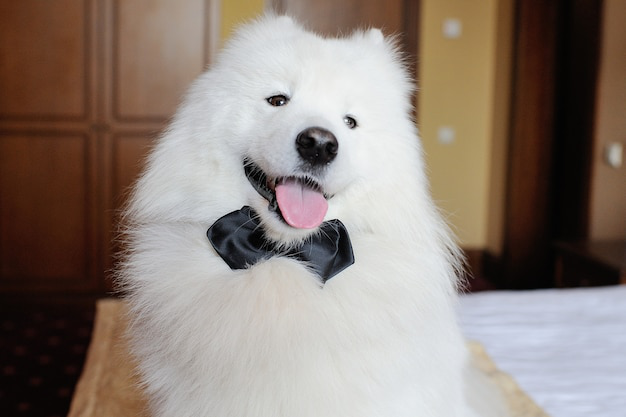

In [ ]:
img = Image.open('/content/white-samoyed-dog-black-tie.jpg')
img

'Samoyed'

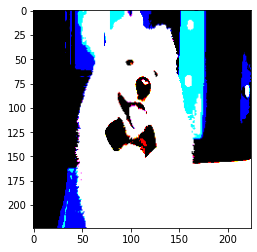

In [ ]:
img = img.resize((224,224))
img_np = np.array(img)
img_np = preprocess_input(img_np)
plt.imshow(img_np)
img_np = img_np.reshape(1, 224, 224, 3) 
result = model.predict(img_np)
id_max = result[0].argmax()
index_class = index_to_class[id_max]
lbl_dict[index_class]

In [ ]:
lbl_dict[index_class]

'Samoyed'

In [ ]:
!wget https://newsroom.unsw.edu.au/sites/default/files/thumbnails/image/1._dingo_on_sand_credit_chontelle_burns_nouveau_rise_photography_3.jpeg

--2022-09-23 23:54:55--  https://newsroom.unsw.edu.au/sites/default/files/thumbnails/image/1._dingo_on_sand_credit_chontelle_burns_nouveau_rise_photography_3.jpeg
Resolving newsroom.unsw.edu.au (newsroom.unsw.edu.au)... 149.171.29.11
Connecting to newsroom.unsw.edu.au (newsroom.unsw.edu.au)|149.171.29.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1182757 (1.1M) [image/jpeg]
Saving to: ‘1._dingo_on_sand_credit_chontelle_burns_nouveau_rise_photography_3.jpeg’

1._dingo_on_sand_cr 100%[===================>]   1.13M   993KB/s    in 1.2s    

2022-09-23 23:54:58 (993 KB/s) - ‘1._dingo_on_sand_credit_chontelle_burns_nouveau_rise_photography_3.jpeg’ saved [1182757/1182757]



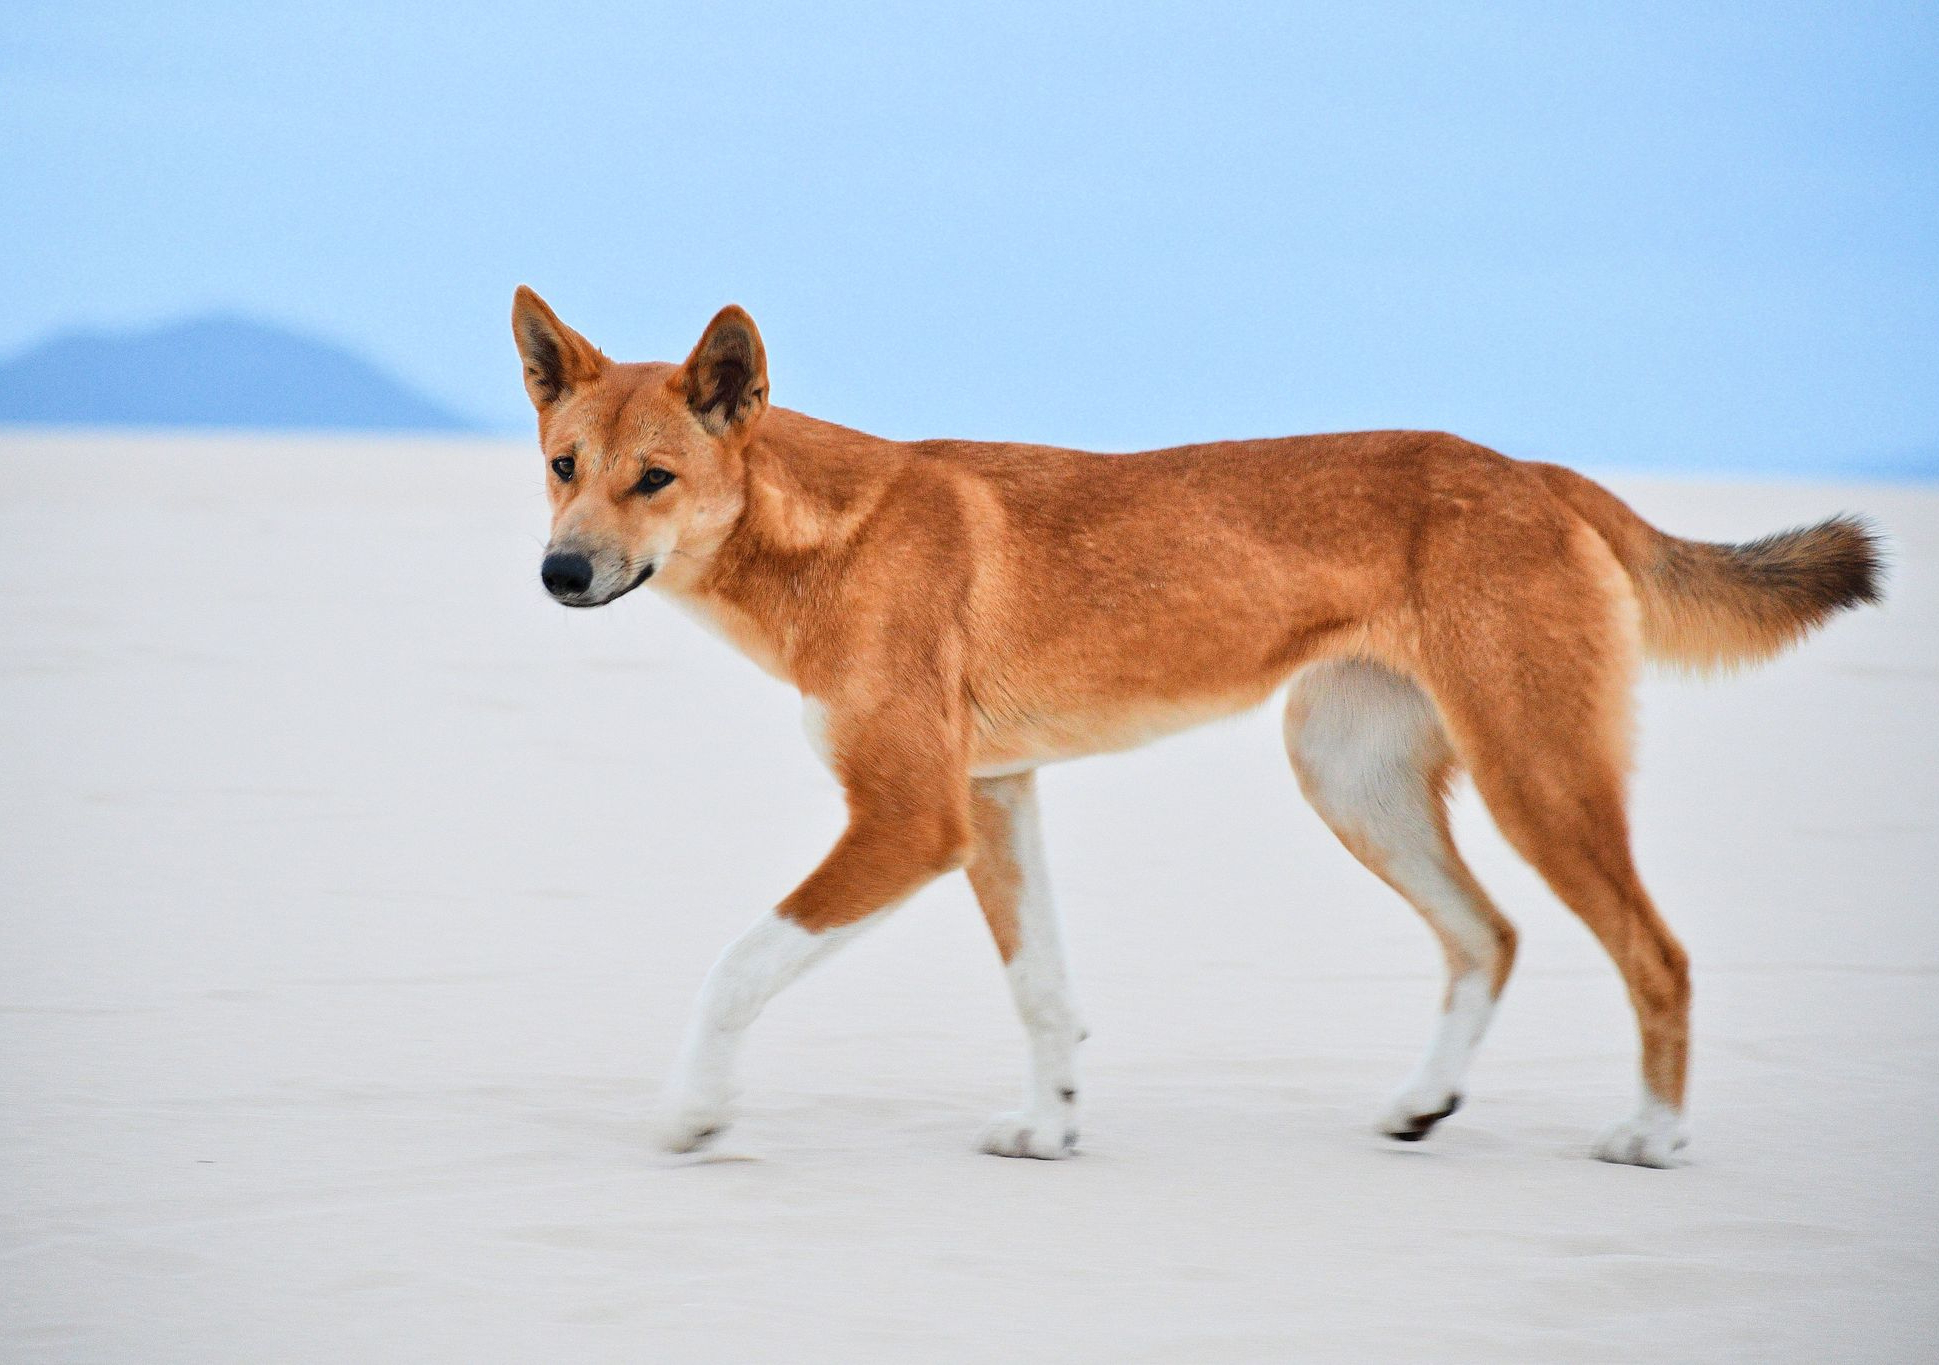

In [ ]:
img = Image.open('/content/1._dingo_on_sand_credit_chontelle_burns_nouveau_rise_photography_3.jpeg')
img

'Dingo'

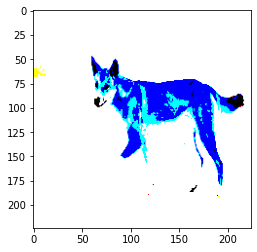

In [ ]:
img = img.resize((224,224))
img_np = np.array(img)
img_np = preprocess_input(img_np)
plt.imshow(img_np)
img_np = img_np.reshape(1, 224, 224, 3) 
result = model.predict(img_np)
id_max = result[0].argmax()
index_class = index_to_class[id_max]
lbl_dict[index_class]